# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [31]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [33]:
#counting the countries
country = df['country'].nunique()
print("Total number of countries present:", country)

Total number of countries present: 219


In [34]:
#finding the timespan
startyear = df['year'].min()
endyear = df['year'].max()
Total_timespan = endyear - startyear
print("Total timespan of the data is:", Total_timespan)

Total timespan of the data is: 33


In [35]:
#Does each country have a row for every year present?
data = df.groupby('country')['year'].nunique()
years = df['year'].nunique()
everyyear = (data==years).all()
print(everyyear)

False


In [36]:
#countries with missing years
data = df.groupby('country')['year'].nunique()
years = df['year'].nunique()
missingyears = list(data[data<years].index)
print("Total countries with missing years:", len(missingyears))
print(f"The countries which are missing years: {missingyears[:10]}")

Total countries with missing years: 9
The countries which are missing years: ['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [37]:
#non_null values
count = df.iloc[:, 3:58].notnull().any(axis=1).sum()
print(f"Total rows with at least 1 non-null values across the columns 3-57 are: {count}")

Total rows with at least 1 non-null values across the columns 3-57 are: 3484


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be:

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [40]:
#disgnosis mapping
diagnosismap = {
    'new_sp': 'Pulmonary Smear (+)',
    'new_sn': 'Pulmonary Smear (-)',
    'new_ep': 'Extrapulmonary',
    'newrel': 'Relapse'
}

#long format
dataframe_long = df.melt(id_vars=['country', 'year'], var_name='cat', value_name='totalcases')

#map
dataframe_long['diagnosis'] = dataframe_long['cat'].replace({f'{key}.*': value for key, value in diagnosismap.items()},regex=True)

#extraction
dataframe_long['gen'] = dataframe_long['cat'].str.extract(r'_([m|f])')
dataframe_long['gen'] = dataframe_long['gen'].map({'m': 'Male', 'f': 'Female'})
dataframe_long['range'] = dataframe_long['cat'].str.extract(r'_([mf])([a-zA-Z0-9]+)$').iloc[:, 1]

def formatage(age_range):
  if not age_range:
    return None

  if re.fullmatch(r'\d{2}',age_range):
    return f'{age_range}+'

  elif re.fullmatch(r'\d{3}',age_range):
    return f'{age_range[0]}-{age_range[1:]}'

  elif re.fullmatch(r'\d{4}',age_range):
    return f'{age_range[:2]}-{age_range[2:]}'

  else:
    return age_range

dataframe_long['range'] = dataframe_long['range'].apply(formatage)

#drop column
dataframe_long = dataframe_long.drop(columns=['cat'])

#print result
print(dataframe_long)

            country  year  totalcases            diagnosis     gen range
0       Afghanistan  1980         NaN  Pulmonary Smear (+)    Male  0-14
1       Afghanistan  1981         NaN  Pulmonary Smear (+)    Male  0-14
2       Afghanistan  1982         NaN  Pulmonary Smear (+)    Male  0-14
3       Afghanistan  1983         NaN  Pulmonary Smear (+)    Male  0-14
4       Afghanistan  1984         NaN  Pulmonary Smear (+)    Male  0-14
...             ...   ...         ...                  ...     ...   ...
405435     Zimbabwe  2009         NaN              Relapse  Female   65+
405436     Zimbabwe  2010         NaN              Relapse  Female   65+
405437     Zimbabwe  2011         NaN              Relapse  Female   65+
405438     Zimbabwe  2012         NaN              Relapse  Female   65+
405439     Zimbabwe  2013       725.0              Relapse  Female   65+

[405440 rows x 6 columns]


## Question 3: Create a graph that shows when countries started to report TB cases.

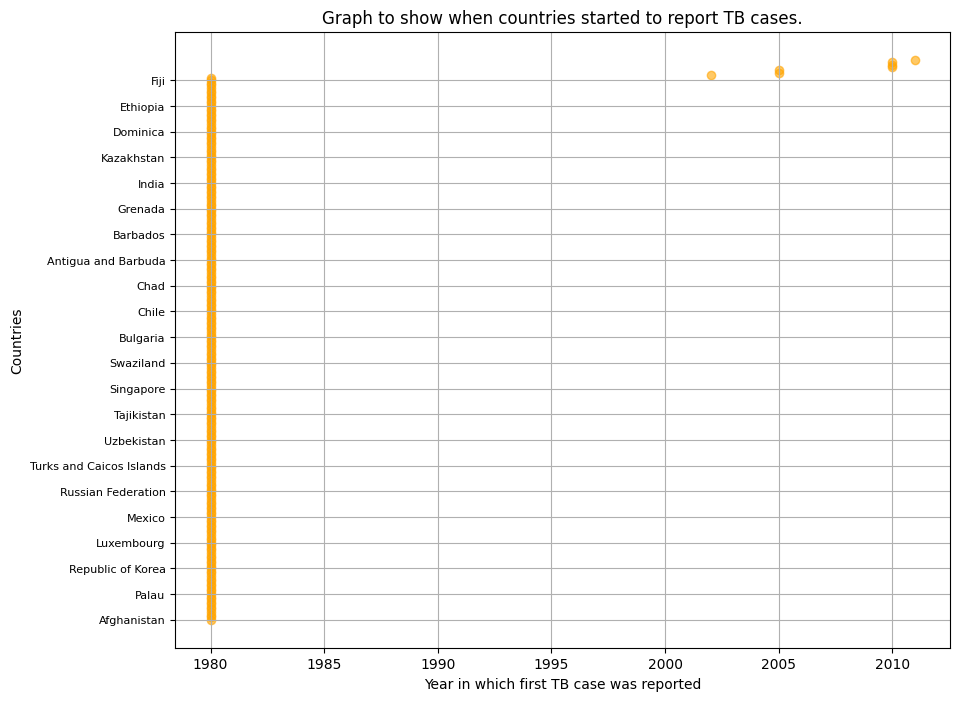

In [39]:
TBstart = dataframe_long.groupby('country')['year'].min().sort_values()

#Plotting the graph
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(TBstart.values,TBstart.index, color='orange', alpha=0.6)

con = TBstart.index
total_countries = len(con)
lap = max(1,total_countries // 20)
ax.set_yticks(con[::lap])
ax.set_yticklabels(con[::lap], fontsize=8)

plt.title('Graph to show when countries started to report TB cases.')
plt.xlabel('Year in which first TB case was reported')
plt.ylabel('Countries')
plt.grid(True)
plt.show()